<a href="https://colab.research.google.com/github/mednour2000/SMCxEdSoc/blob/main/SMCxEdSoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Statistiques descriptives**

In [ ]:
#librairie pandas
import pandas as pd
#Stat - librairie numpy
import numpy as np

import seaborn as sns

#scikit-learn
import sklearn
#scree plot
import matplotlib.pyplot as plt
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import cluster

from scipy.cluster.hierarchy import dendrogram , linkage, fcluster

In [ ]:
!pip install gdown
import gdown


file_url = 'https://docs.google.com/spreadsheets/d/1HZnOoMVbbGE4CsCkGz12JFOtJUJ92j9-/edit?usp=sharing&ouid=118133920482728232855&rtpof=true&sd=true'

# Get the file ID from the link
file_id = file_url.split('/')[-2]

# Construct the download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Specify the destination file path in Colab
destination_path = '/content/SMC.xlsx'

# Download the file
gdown.download(download_link, destination_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1HZnOoMVbbGE4CsCkGz12JFOtJUJ92j9-
To: /content/SMC.xlsx
100%|██████████| 127k/127k [00:00<00:00, 18.1MB/s]


'/content/SMC.xlsx'

In [ ]:
#Lire le fichier Excel et afficher les premières lignes
df = pd.read_excel("SMC.xlsx", skiprows=[0, 1])
print(df.head())

   MWB   SRA   EMC   MHRS   MHA   PHR   SHS   PAE   DNS  PHI  ...  HSW  UES  \
0   8.0   9.0   4.0    2.0   4.0   8.0   6.0   2.0  3.0  6.0  ...  9.0  4.0   
1   5.0   5.0   5.0    5.0   4.0   7.0   6.0   5.0  3.0  5.0  ...  4.0  3.0   
2   8.0   9.0   7.0    4.0   6.0   8.0   8.0   1.0  5.0  5.0  ...  3.0  5.0   
3   7.0   6.0   5.0    2.0   9.0   9.0   5.0   4.0  2.0  8.0  ...  4.0  7.0   
4   7.0   5.0   8.0    5.0   8.0   4.0   7.0   1.0  4.0  6.0  ...  7.0  9.0   

   TMM  AAC  CESA  ETC  CAS  CMS  EYI  Gender  
0  4.0  3.0   3.0  5.0  3.0  3.0  7.0  Female  
1  5.0  4.0   3.0  4.0  2.0  4.0  3.0  Female  
2  5.0  5.0   3.0  2.0  2.0  3.0  4.0  Female  
3  4.0  6.0   9.0  8.0  7.0  3.0  5.0  Female  
4  5.0  7.0   1.0  8.0  5.0  9.0  8.0  Female  

[5 rows x 26 columns]


In [ ]:
#dimension
print(df.shape)
n, p = df.shape
print(f"Nombre d'individus: {n}") #lignes
print(f"Nombre de variables: {p}") #colonnes

(223, 26)
Nombre d'individus: 223
Nombre de variables: 26


In [ ]:
#Afficher les statistiques descriptives pour toutes les colonnes
print(df.describe(include='all'))

In [ ]:
import matplotlib.pyplot as plt
  # Create a histogram of the variable's distribution
variables = df.columns.tolist()
print(variables)
for variable in variables:
    plt.hist(df[variable], bins=10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.show()

**We will explore the results of this analyses answering 25 questions that will help us understand students' mental well-being**



**1.  How do students rate their mental health and what are the specific factors correlated with this rating ?**



In [ ]:
mwb_stats = df['MWB '].describe()
print(" Descriptive Statistics for 'MWB' in dataframe ")
print(mwb_stats)

 Descriptive Statistics for 'MWB' in dataframe 
count    222.000000
mean       6.049550
std        2.097677
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: MWB , dtype: float64


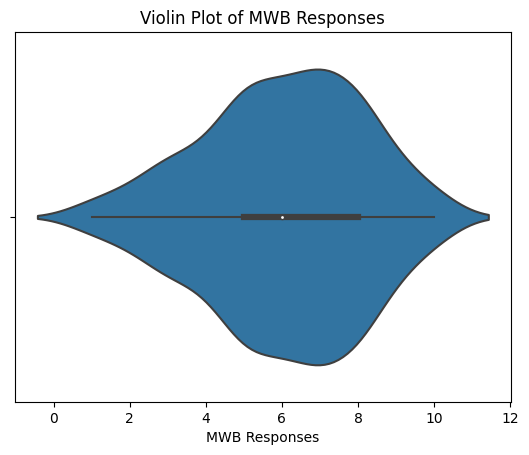

In [ ]:
# Assuming 'data' is your dataset with the 'MWB' variable
sns.violinplot(x='MWB ', data=df)
plt.title('Violin Plot of MWB Responses')
plt.xlabel('MWB Responses')
plt.show()


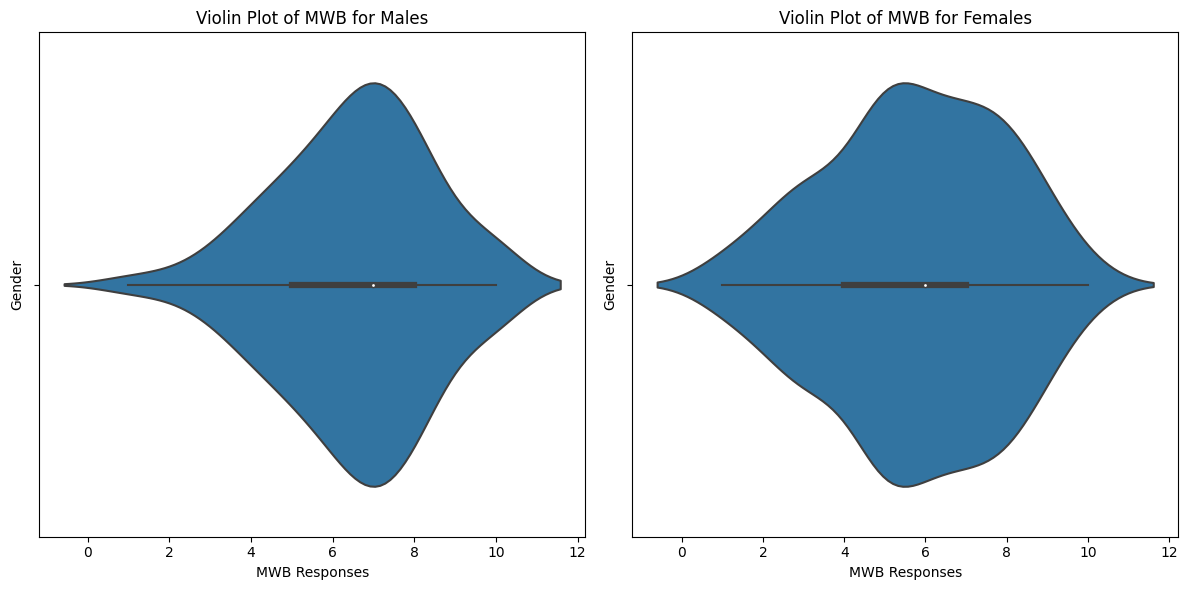

In [ ]:

# Filter data for male and female
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Create violin plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='MWB ', data=male_data)
plt.title('Violin Plot of MWB for Males')
plt.xlabel('MWB Responses')
plt.ylabel('Gender')

plt.subplot(1, 2, 2)
sns.violinplot(x='MWB ', data=female_data)
plt.title('Violin Plot of MWB for Females')
plt.xlabel('MWB Responses')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()


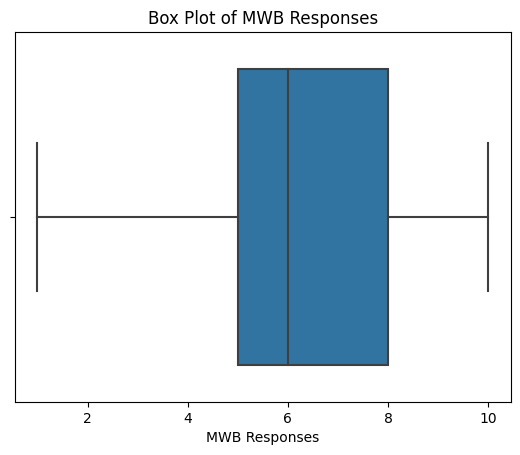

In [ ]:

# Assuming 'data' is your dataset with the 'MWB' variable
sns.boxplot(x='MWB ', data=df)
plt.title('Box Plot of MWB Responses')
plt.xlabel('MWB Responses')
plt.show()


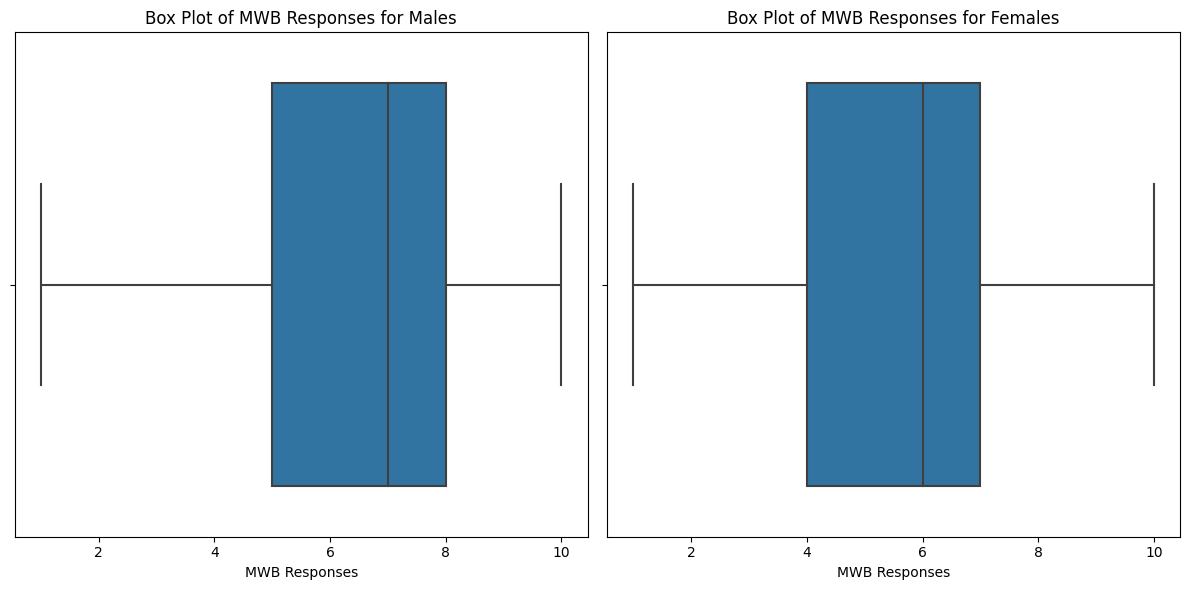

In [ ]:

# Create side-by-side box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='MWB ', data=male_data)
plt.title('Box Plot of MWB Responses for Males')
plt.xlabel('MWB Responses')

plt.subplot(1, 2, 2)
sns.boxplot(x='MWB ', data=female_data)
plt.title('Box Plot of MWB Responses for Females')
plt.xlabel('MWB Responses')

plt.tight_layout()
plt.show()


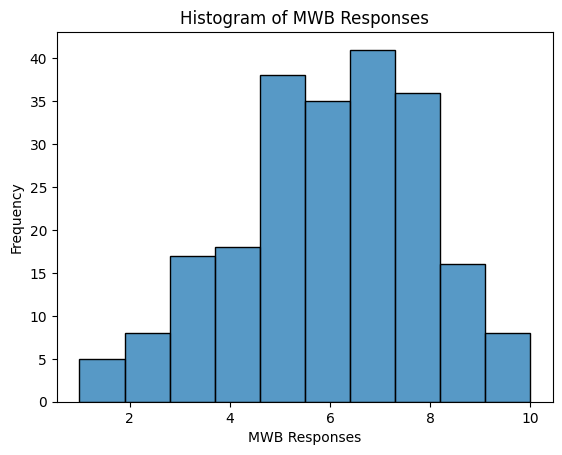

In [ ]:

# Assuming 'data' is your dataset with the 'MWB' variable
sns.histplot(df['MWB '], bins=10, kde=False)
plt.title('Histogram of MWB Responses')
plt.xlabel('MWB Responses')
plt.ylabel('Frequency')
plt.show()


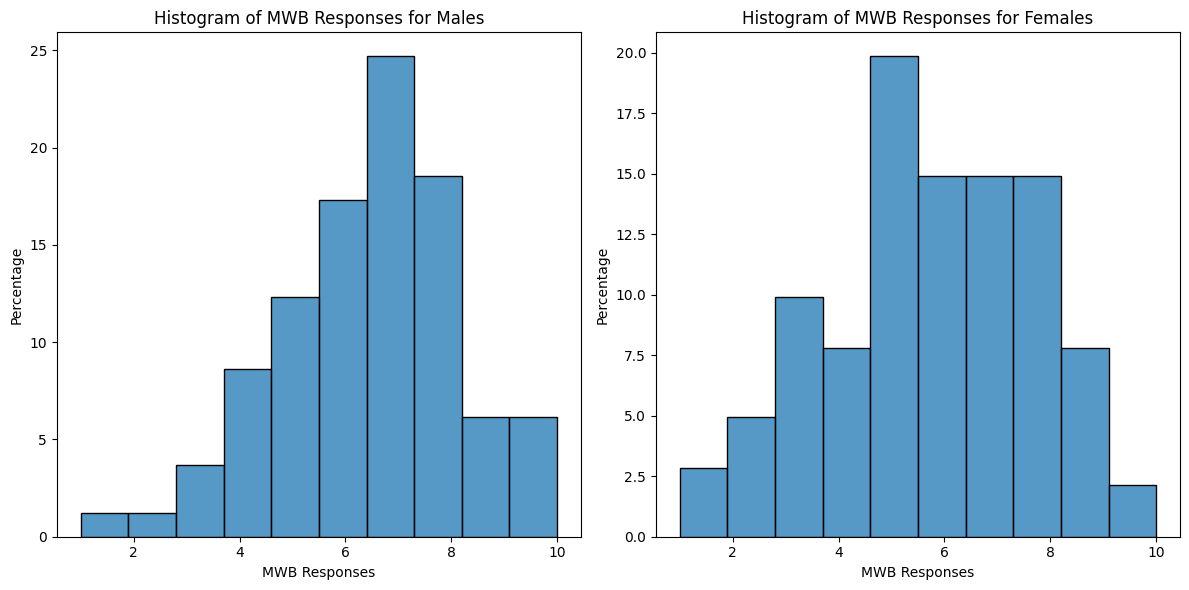

In [ ]:
# Filter data for male and female
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Create side-by-side histograms with percentage normalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(male_data['MWB '], bins=10, kde=False, stat='percent')
plt.title('Histogram of MWB Responses for Males')
plt.xlabel('MWB Responses')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
sns.histplot(female_data['MWB '], bins=10, kde=False, stat='percent')
plt.title('Histogram of MWB Responses for Females')
plt.xlabel('MWB Responses')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


In [ ]:
# Descriptive statistics for 'MWB' in male DataFrame
male_mwb_stats = male_data['MWB '].describe()

# Descriptive statistics for 'MWB' in female DataFrame
female_mwb_stats = female_data['MWB '].describe()

# Display the results
print("Descriptive Statistics for 'MWB' in Male Data:")
print(male_mwb_stats)

print("\nDescriptive Statistics for 'MWB' in Female Data:")
print(female_mwb_stats)


Descriptive Statistics for 'MWB' in Male Data:
count    81.000000
mean      6.530864
std       1.897936
min       1.000000
25%       5.000000
50%       7.000000
75%       8.000000
max      10.000000
Name: MWB , dtype: float64

Descriptive Statistics for 'MWB' in Female Data:
count    141.000000
mean       5.773050
std        2.162567
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: MWB , dtype: float64


# Descriptive Statistics for 'MWB' in the Entire Dataset

## Mean (Average)
- The mean 'MWB' score is approximately 6.05 out of 10.
- This suggests that, on average, individuals in the dataset report a moderately positive well-being level.

## Standard Deviation (std)
- The standard deviation is about 2.10.
- This indicates a moderate amount of variability or dispersion in 'MWB' scores across the dataset.
- The higher the standard deviation, the more spread out the scores are from the mean.

## Percentiles (Quartiles)
- **25th Percentile (Q1):**
  - 25% of individuals have an 'MWB' score below 5.
  - This quartile helps identify the lower range of well-being scores in the dataset.
- **50th Percentile (Median):**
  - The median 'MWB' score is 6.
  - This is the middle value, suggesting that half of the individuals report a 'MWB' score of 6 or lower, and half report a score of 6 or higher.
- **75th Percentile (Q3):**
  - 75% of individuals have an 'MWB' score below 8.
  - This quartile provides insight into the higher range of well-being scores in the dataset.

## Interpretation
- The average 'MWB' score indicates a generally positive well-being level among individuals in the dataset.
- The standard deviation highlights the variability in well-being scores, showing that experiences are moderately diverse across the sample.
- The percentiles provide a nuanced view of the distribution, allowing us to understand both lower and higher ranges of well-being in the dataset.



# Comparative Interpretation: Well-Being ('MWB') Analysis for Males and Females

### Male Data:
- **Count (n):** 81 observations for males.
- **Mean:** The average 'MWB' score for males is approximately 6.53 out of 10.
- **Standard Deviation (std):** The standard deviation is about 1.90, indicating moderate variability in 'MWB' scores among males.
- **25th Percentile (Q1):** 25% of males have an 'MWB' score below 5.
- **Median (50th Percentile):** The middle 'MWB' score for males is 7.
- **75th Percentile (Q3):** 75% of males have an 'MWB' score below 8.

### Female Data:
- **Count (n):** 141 observations for females.
- **Mean:** The average 'MWB' score for females is approximately 5.77 out of 10.
- **Standard Deviation (std):** The standard deviation is about 2.16, indicating a higher degree of variability in 'MWB' scores among females compared to males.
- **25th Percentile (Q1):** 25% of females have an 'MWB' score below 4.
- **Median (50th Percentile):** The middle 'MWB' score for females is 6.
- **75th Percentile (Q3):** 75% of females have an 'MWB' score below 7.

### Comparative Interpretation:
- **Mean Comparison:**
  - Males, on average, report a slightly higher 'MWB' score (6.53) compared to females (5.77).
- **Variability Comparison:**
  - The standard deviation for females (2.16) is higher than that for males (1.90), indicating greater variability in 'MWB' scores among females.
- **Quartile Comparison:**
  - The 25th and 75th percentiles suggest that the lower and upper ranges of 'MWB' scores are generally higher for males compared to females.

**Overall Observation:**
The descriptive statistics reveal differences in the central tendency and variability of 'MWB' scores between males and females. While males, on average, report slightly higher well-being, females exhibit greater variability in their well-being scores. The quartile comparisons provide insights into the distribution of scores, highlighting specific percentiles where the two groups differ.


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with 'MWB'
mwb_correlations = correlation_matrix['MWB ']

# Display the correlations
print(mwb_correlations)

MWB      1.000000
SRA     -0.190988
EMC      0.416596
MHRS     0.212432
MHA      0.285315
PHR      0.413317
SHS      0.070607
PAE      0.116659
DNS      0.173329
PHI      0.037520
SIRU     0.325701
SAP      0.118482
SB       0.327176
SSN      0.319207
SRI      0.062157
UOE      0.365825
HSW      0.063245
UES      0.253930
TMM      0.241447
AAC      0.399493
CESA     0.234189
ETC      0.302441
CAS      0.212847
CMS      0.264172
EYI      0.083603
Name: MWB , dtype: float64


<ipython-input-19-9d9407638686>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
# Sort correlations by absolute values in descending order
sorted_correlations = mwb_correlations.abs().sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)


MWB      1.000000
EMC      0.416596
PHR      0.413317
AAC      0.399493
UOE      0.365825
SB       0.327176
SIRU     0.325701
SSN      0.319207
ETC      0.302441
MHA      0.285315
CMS      0.264172
UES      0.253930
TMM      0.241447
CESA     0.234189
CAS      0.212847
MHRS     0.212432
SRA      0.190988
DNS      0.173329
SAP      0.118482
PAE      0.116659
EYI      0.083603
SHS      0.070607
HSW      0.063245
SRI      0.062157
PHI      0.037520
Name: MWB , dtype: float64


NOTE : **Strength of Correlation**

The correlation coefficients range from weak to moderate. Moderate correlations, such as those around 0.4, are often considered meaningful and can provide valuable insights.

**Overall Implications**

The strongest positive correlations with 'MWB' are observed for **emotional management capacity, physical health, and academic achievements satisfaction**.


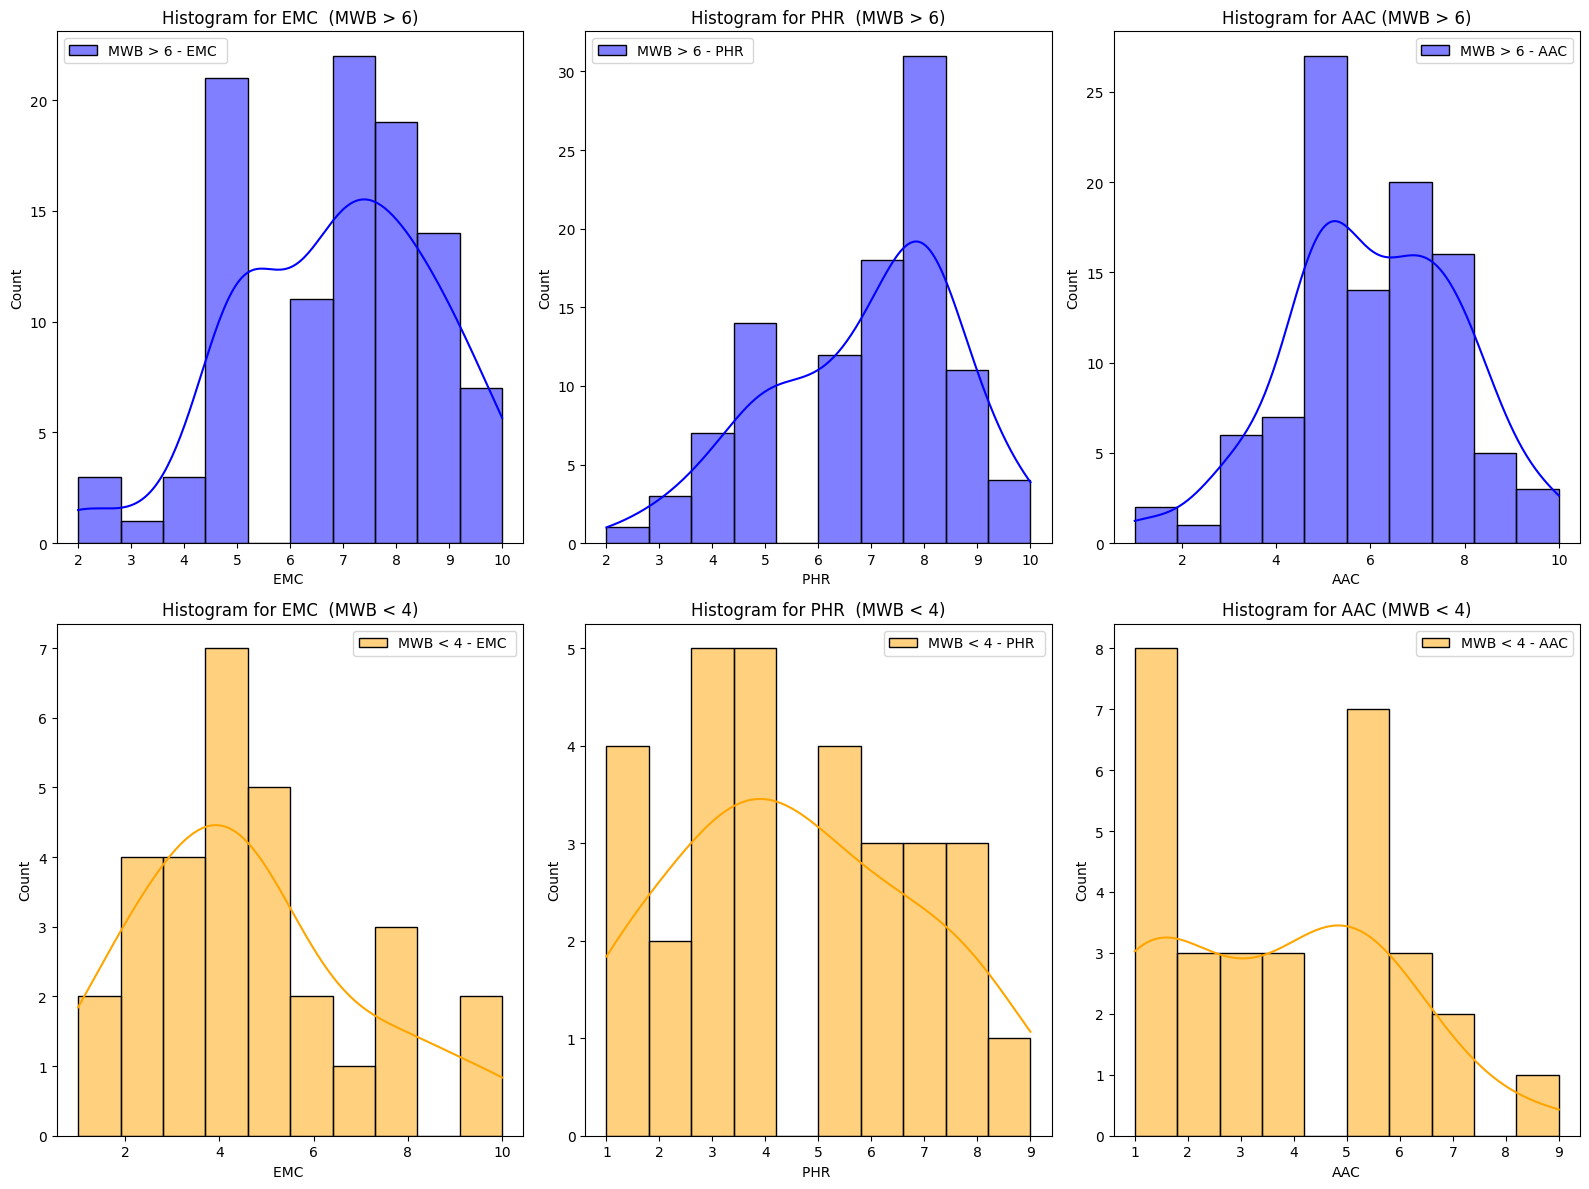

In [ ]:
# Create separate DataFrames for 'MWB' > 6 and 'MWB' < 4
high_mwb_data = df[df['MWB '] > 6]
low_mwb_data = df[df['MWB '] < 4]

# Columns of interest
columns_of_interest = ['EMC ', 'PHR ', 'AAC']

# Plot histograms for 'EMC', 'PHR', 'AAC' in MWB > 6 and MWB < 4
plt.figure(figsize=(16, 12))

for i, column in enumerate(columns_of_interest):
    plt.subplot(2, 3, i + 1)
    sns.histplot(high_mwb_data[column], bins=10, kde=True, label=f'MWB > 6 - {column}', color='blue')
    plt.title(f'Histogram for {column} (MWB > 6)')
    plt.legend()

for i, column in enumerate(columns_of_interest):
    plt.subplot(2, 3, i + 4)
    sns.histplot(low_mwb_data[column], bins=10, kde=True, label=f'MWB < 4 - {column}', color='orange')
    plt.title(f'Histogram for {column} (MWB < 4)')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(low_mwb_data)


     MWB   SRA   EMC   MHRS   MHA   PHR   SHS   PAE   DNS   PHI  SIRU   SAP  \
7     3.0   8.0   3.0    2.0   1.0   4.0  10.0   1.0  4.0   5.0   4.0   3.0   
15    1.0   5.0   5.0    5.0   1.0   1.0   5.0   1.0  5.0   7.0   7.0   1.0   
17    3.0   8.0   4.0    1.0   4.0   8.0   6.0   7.0  2.0   8.0   5.0   3.0   
23    3.0   9.0   6.0    2.0   3.0   3.0   5.0   1.0  2.0  10.0   3.0   1.0   
24    3.0   8.0   6.0    1.0   6.0   9.0   9.0  10.0  8.0  10.0   4.0   7.0   
28    3.0  10.0   4.0    1.0   4.0   4.0   5.0   5.0  4.0  10.0   3.0   3.0   
30    1.0   1.0   1.0    1.0   1.0   1.0   5.0   2.0  8.0  10.0   1.0   9.0   
40    2.0   6.0   3.0    2.0   1.0   4.0   5.0   1.0  2.0   7.0   5.0   1.0   
47    3.0   9.0   1.0    1.0   2.0   5.0   7.0   1.0  3.0   7.0   1.0   1.0   
56    3.0   6.0   5.0    5.0   3.0   3.0   1.0   1.0  1.0   3.0   1.0   1.0   
57    3.0   9.0   5.0    4.0   6.0   5.0  10.0   3.0  8.0   7.0   7.0   7.0   
58    3.0  10.0   8.0    1.0   6.0   6.0   4.0   1.0

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'X' with the actual variable of interest

# Select the first 25 columns
selected_columns = low_mwb_data.columns[:25]

# Calculate and print the sum for each set of 5 columns and total sum for each row
for i in range(0, 25, 5):
    subset_columns = selected_columns[i:i+5]
    subset_sum = low_mwb_data[subset_columns].sum(axis=1)
    print(f'Sum_{i+1}_{i+5}:')
    print(subset_sum)
    print()

# Calculate and print the total sum for each row
total_sum = low_mwb_data[selected_columns].sum(axis=1)
print('Total_Sum:')
print(total_sum)


Sum_1_5:
7      17.0
15     17.0
17     20.0
23     23.0
24     24.0
28     22.0
30      5.0
40     14.0
47     16.0
56     22.0
57     27.0
58     28.0
70     28.0
77     19.0
79     17.0
81     20.0
86     18.0
100    18.0
124    16.0
131    17.0
134    21.0
139    24.0
163    15.0
169    16.0
174    19.0
190    20.0
194    28.0
208    17.0
209    22.0
211    20.0
dtype: float64

Sum_6_10:
7      24.0
15     19.0
17     31.0
23     21.0
24     46.0
28     28.0
30     26.0
40     19.0
47     23.0
56      9.0
57     33.0
58     16.0
70     28.0
77     29.0
79     14.0
81     26.0
86     15.0
100    15.0
124    34.0
131    24.0
134    31.0
139    24.0
163    28.0
169    20.0
174    25.0
190    21.0
194    27.0
208    20.0
209    13.0
211     5.0
dtype: float64

Sum_11_15:
7      18.0
15     26.0
17     23.0
23     15.0
24     24.0
28     20.0
30     18.0
40     21.0
47     12.0
56     21.0
57     34.0
58      7.0
70     42.0
77     21.0
79     18.0
81     28.0
86     32.0
100    13.0
12

**2. Frequency of stress related to academic pressures.**

SRA variable is the response to the question How often do you experience stress related to academic pressures? (1 = Rarely, 5 = Occasionally, 10 = Frequently)

In [ ]:
SRA_stats = df['SRA '].describe()
print(" Descriptive Statistics for 'SRA' in dataframe ")
print(SRA_stats)

 Descriptive Statistics for 'SRA' in dataframe 
count    222.000000
mean       6.567568
std        2.453630
min        1.000000
25%        5.000000
50%        7.000000
75%        8.750000
max       10.000000
Name: SRA , dtype: float64


# Descriptive Statistics for 'SRA' Variable

The following descriptive statistics provide insights into the distribution of responses to the question "How often do you experience stress related to academic pressures?" The 'SRA' variable represents the responses on a scale from 1 (Rarely) to 10 (Frequently).

1. **Mean (Average):**
   - Mean = 6.57: The average stress rating of 6.57 suggests a notable presence of academic stress within the surveyed population. This average underscores a noteworthy level of perceived pressure.

2. **Standard Deviation:**
   - Standard Deviation = 2.45: With a standard deviation of 2.45, there exists a moderate degree of variability in stress levels across respondents. This variability necessitates a closer examination of individual experiences.

3. **Percentiles (Quartiles):**
   - 25th Percentile (Q1) = 5: At the 25th percentile, a quarter of respondents reported stress levels at or below 5, reflecting a considerable proportion with lower stress perceptions.
   - 50th Percentile (Median or Q2) = 7: The median stress level of 7 indicates that 50% of respondents reported stress levels at or below this point, providing a central measure for the dataset.
   - 75th Percentile (Q3) = 8.75: At the 75th percentile, three-quarters of respondents reported stress levels at or below 8.75, emphasizing the prevailing challenges faced by a substantial majority.

In summary, the dataset reveals a diverse range of stress perceptions related to academic pressures, with an average stress level indicating a notable presence of stress. The variability in responses highlights the importance of exploring individual experiences and potential factors contributing to stress levels.


AAC is a response to the question "How satisfied are you with your academic achievement?

In [ ]:
AAC_stats = df['AAC'].describe()
print(" Descriptive Statistics for 'AAC' in dataframe ")
print(AAC_stats)

 Descriptive Statistics for 'AAC' in dataframe 
count    222.000000
mean       5.288288
std        2.137311
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: AAC, dtype: float64


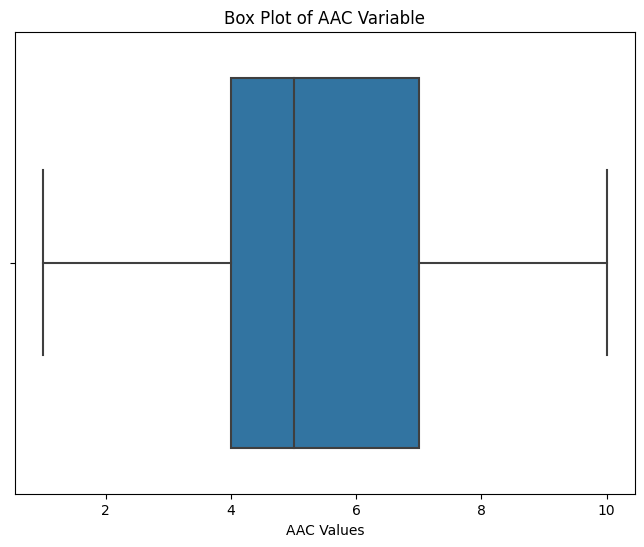

In [ ]:
# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AAC'])

# Adding labels and title
plt.title('Box Plot of AAC Variable')
plt.xlabel('AAC Values')

# Display the box plot
plt.show()


**AAC (Academic Achievement Satisfaction):**
**Mean (Average):**

The average satisfaction with academic achievement is approximately 5.29 out of 10, suggesting a moderate level of satisfaction on average.

**Percentiles (Quartiles):**

At the 25th percentile, a quarter of respondents reported satisfaction scores of 4 or lower, indicating a subgroup with relatively lower satisfaction.
The median satisfaction score is 5, representing the middle point, with 50% of respondents reporting scores of 5 or lower.
At the 75th percentile, three-quarters of respondents reported satisfaction scores of 7 or lower.

**Interpretation:**
 While the average satisfaction is moderate, the presence of a subgroup reporting lower satisfaction (25th percentile) warrants attention, and addressing factors contributing to lower satisfaction could be crucial.

UES is the response to the question "To what extent do you feel the university environment supports your academic success? (1 = Not at all, 5 = Moderately, 10 = Completely)"

In [ ]:
UES_stats = df['UES'].describe()
print(" Descriptive Statistics for 'UES' in dataframe ")
print(UES_stats)

 Descriptive Statistics for 'UES' in dataframe 
count    222.000000
mean       4.472973
std        2.461778
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: UES, dtype: float64


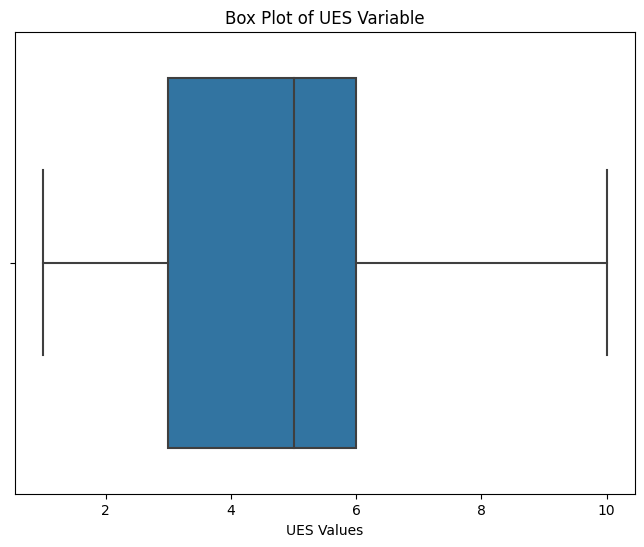

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'AAC' variable

# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['UES'])

# Adding labels and title
plt.title('Box Plot of UES Variable')
plt.xlabel('UES Values')

# Display the box plot
plt.show()


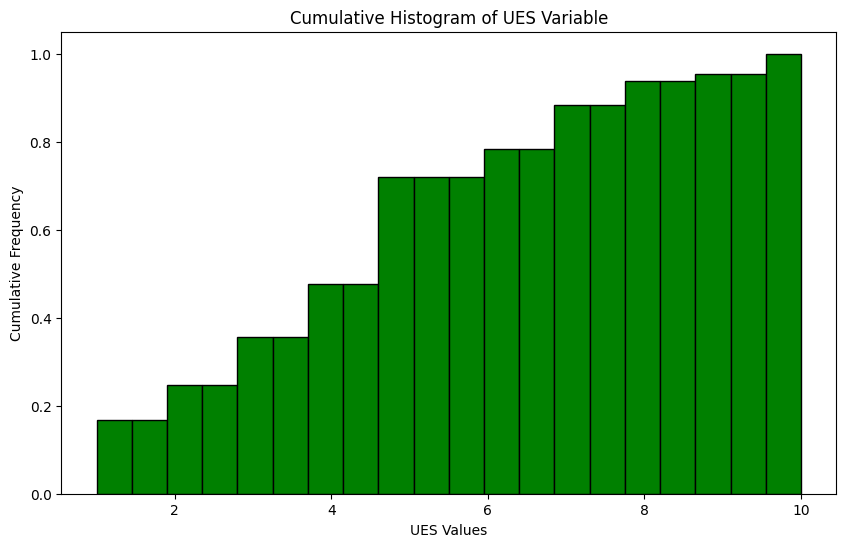

In [ ]:
# Plotting the cumulative histogram
plt.figure(figsize=(10, 6))
plt.hist(df['UES'], bins=20, color='green', edgecolor='black', cumulative=True, density=True)

# Adding labels and title
plt.title('Cumulative Histogram of UES Variable')
plt.xlabel('UES Values')
plt.ylabel('Cumulative Frequency')

# Display the cumulative histogram
plt.show()


### UES (University Environment Support):

1. **Mean (Average):**
   - The average perception of university environment support is approximately 4.47 out of 10, indicating a concerning low level of perceived support on average.

2. **Percentiles (Quartiles):**
   - At the 25th percentile, a quarter of respondents reported perceived support scores of 3 or lower, underscoring a subgroup with notably lower perceived support.
   - The median perceived support score is 5, representing the middle point, with more than 50% of respondents reporting scores below 5.
   - At the 75th percentile, three-quarters of respondents reported perceived support scores of 6 or lower.

**Revised Interpretation:** The average perceived support is notably low, and the majority of respondents (more than 50%) perceive the level of support below 5. This is a particularly alarming indicator, signaling that a substantial portion of the surveyed population perceives inadequate support from the university environment. Urgent attention and targeted interventions are necessary to address these concerns and enhance the overall support system for students' academic success and well-being. Identifying and rectifying specific issues contributing to this low perception of support is crucial for fostering a more supportive and conducive university environment.

# Overall Interpretation:

## UES (University Environment Support):
- The average perception of university environment support is notably low, with a mean of 4.47 out of 10.
- More than 50% of respondents perceive the level of support below 5, indicating a concerning trend.
- A quarter of respondents report perceived support scores of 3 or lower, highlighting a subgroup with particularly low perceived support.

## AAC (Academic Achievement Satisfaction):
- The average satisfaction with academic achievement is approximately 5.29 out of 10, suggesting a moderate level of satisfaction on average.
- A quarter of respondents report satisfaction scores of 4 or lower, indicating a subgroup with relatively lower satisfaction.
- The presence of this subgroup emphasizes potential areas of concern regarding satisfaction with academic achievement.

## SRA (Stress Related to Academic Pressures):
- The average stress rating is 6.57 out of 10, indicating a notable presence of academic stress within the surveyed population.
- The standard deviation of 2.45 suggests a moderate degree of variability in stress levels across respondents, emphasizing diversity in stress experiences.
- Quartiles reveal a broad spectrum of stress perceptions, with 25% reporting stress levels at or below 5, and three-quarters reporting stress levels at or below 8.75.

# Connections and Considerations:

- **Low UES and AAC Satisfaction:**
  - The low average perceived support from the university environment (UES) may contribute to lower satisfaction with academic achievement (AAC).
  - Students perceiving inadequate support may face challenges in achieving their academic goals, affecting their overall satisfaction.

- **UES, AAC, and Academic Stress (SRA):**
  - The presence of academic stress (SRA) is notable, with a significant average stress rating.
  - Low perceived support (UES) and lower satisfaction with academic achievement (AAC) may contribute to elevated stress levels, creating a potential cycle of dissatisfaction and stress.

- **Targeted Interventions:**
  - Urgent attention is needed to address the low perceived support from the university environment, particularly as it correlates with lower satisfaction and potentially elevated stress.
  - Targeted interventions should consider the interconnectedness of these factors, aiming to improve the overall well-being and academic success of the student population.

**In summary, the combined interpretation highlights the interplay between low perceived support, moderate satisfaction, and notable academic stress. Addressing these concerns holistically is crucial for creating a supportive university environment that fosters academic success and well-being among students. Targeted interventions should consider the relationships between UES, AAC, and SRA to implement effective strategies for improvement.**


**3. Perception of Coping Mechanisms and Mental Health Resources**



MHRS is the answer to the question How satisfied are you with the availability of mental health resources and support on campus? (1 = Very dissatisfied, 5 = Neutral, 10 = Very satisfied)

In [ ]:
# Assuming 'MHRS' is the column in your DataFrame 'df'
mhrs_stats = df['MHRS '].describe()

# Print descriptive statistics
print("Descriptive Statistics for 'MHRS' in dataframe")
print(mhrs_stats)


Descriptive Statistics for 'MHRS' in dataframe
count    222.000000
mean       2.657658
std        1.947248
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: MHRS , dtype: float64


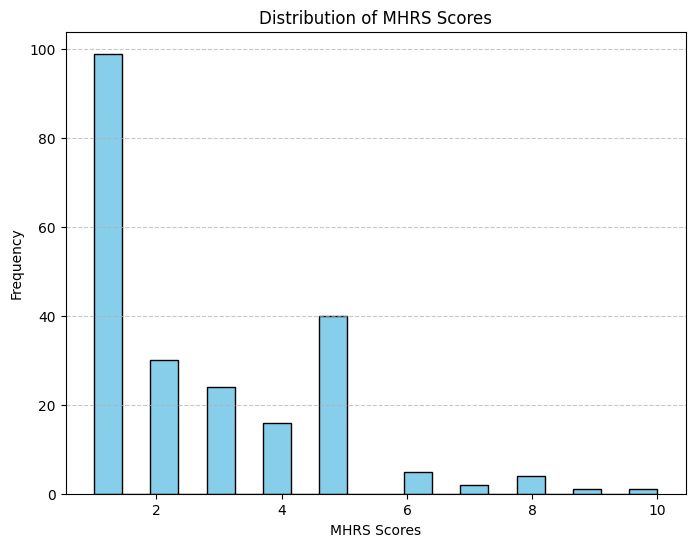

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'MHRS' is the column in your DataFrame 'df'
plt.figure(figsize=(8, 6))
plt.hist(df['MHRS '], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of MHRS Scores')
plt.xlabel('MHRS Scores')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Mean:**

The average satisfaction score is approximately 2.66 out of 10.
This suggests an overall low level of satisfaction with the availability of mental health resources and support on campus.

**Standard Deviation:**

The standard deviation is approximately 1.95.
The relatively high standard deviation indicates a considerable amount of variability in the responses, implying that opinions are diverse across respondents.

**Percentiles (Quartiles):**

25% of respondents gave a satisfaction score of 1 or lower, indicating a substantial proportion of respondents expressing dissatisfaction.
50% of respondents gave a satisfaction score of 2 or lower, representing the median score and suggesting a majority leaning towards lower satisfaction.
75% of respondents gave a satisfaction score of 4 or lower, indicating that a significant portion of the respondents has relatively low satisfaction.

**Interpretation:**

The descriptive statistics reveal a concerning situation regarding the satisfaction with the availability of mental health resources and support on campus. The average satisfaction score of approximately 2.66 out of 10, coupled with a standard deviation of 1.95, underscores the severity of the issue. The high standard deviation indicates a substantial diversity of opinions and experiences among respondents, reflecting a wide range of dissatisfaction levels.

Given the low average satisfaction score and the notable variability in responses, it is clear that addressing this issue is crucial. The university should consider conducting in-depth assessments, seeking qualitative feedback, and implementing targeted interventions to improve the mental health resources and support available on campus. The goal should be to create a more supportive environment that caters to the diverse needs and concerns of the student population.

MHA is the answer to the question "On a scale from 1 to 10, how often do you
engage in activities that positively impact your mental health?"

In [ ]:
import pandas as pd

# Assuming 'MHA' is the column in your DataFrame 'df'
mha_stats = df['MHA '].describe()

# Print descriptive statistics
print("Descriptive Statistics for 'MHA' in dataframe")
print(mha_stats)


Descriptive Statistics for 'MHA' in dataframe
count    222.000000
mean       4.684685
std        2.506036
min        1.000000
25%        3.000000
50%        5.000000
75%        6.750000
max       10.000000
Name: MHA , dtype: float64


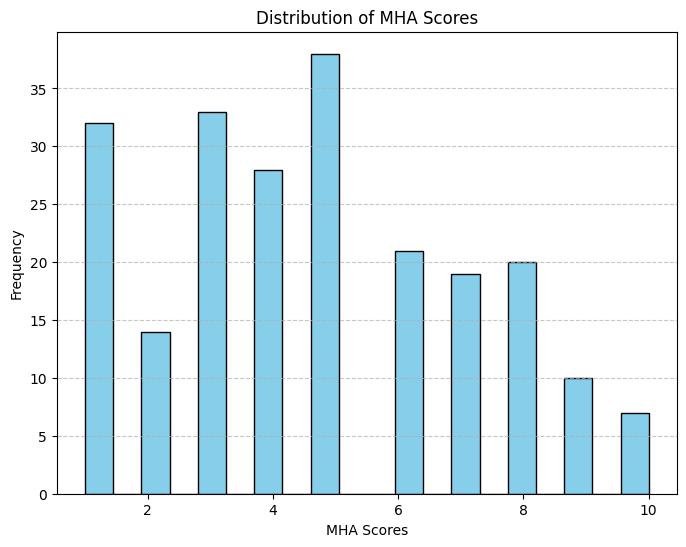

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'MHA' is the column in your DataFrame 'df'
plt.figure(figsize=(8, 6))
plt.hist(df['MHA '], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of MHA Scores')
plt.xlabel('MHA Scores')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The descriptive statistics for the 'MHA' variable reveal important insights into the frequency of engaging in activities that positively impact mental health among the student population:

1. **Mean Frequency:**
   - On average, students reported a moderate frequency of 4.68 out of 10 in engaging in activities that positively impact their mental health.

2. **Frequency Distribution:**
   - Significantly, more than 90 students (25% at the 25th percentile and 50% at the median) have reported engaging in such activities at a frequency of 4 or lower.
   - This concentration of responses at lower frequencies underscores a considerable portion of the student population reporting infrequent engagement in activities beneficial to their mental health.

3. **Implications:**
   - The prevalence of responses at lower frequencies suggests a potential need for targeted interventions or initiatives to encourage and support students in incorporating more regular and beneficial activities into their routines. Understanding the specific challenges or barriers that contribute to lower engagement levels could inform strategies to enhance the overall mental well-being of the student community.

 CMS is the answer to the question "How satisfied are you with the variety of coping mechanisms available to you? (1 = Very dissatisfied, 5 = Neutral, 10 = Very satisfied)"

In [ ]:
import pandas as pd

# Assuming 'CMS' is the column in your DataFrame 'df'
cms_stats = df['CMS'].describe()

# Print descriptive statistics
print("Descriptive Statistics for 'CMS' in dataframe")
print(cms_stats)


Descriptive Statistics for 'CMS' in dataframe
count    222.000000
mean       4.013514
std        2.121810
min        1.000000
25%        2.000000
50%        5.000000
75%        5.000000
max       10.000000
Name: CMS, dtype: float64


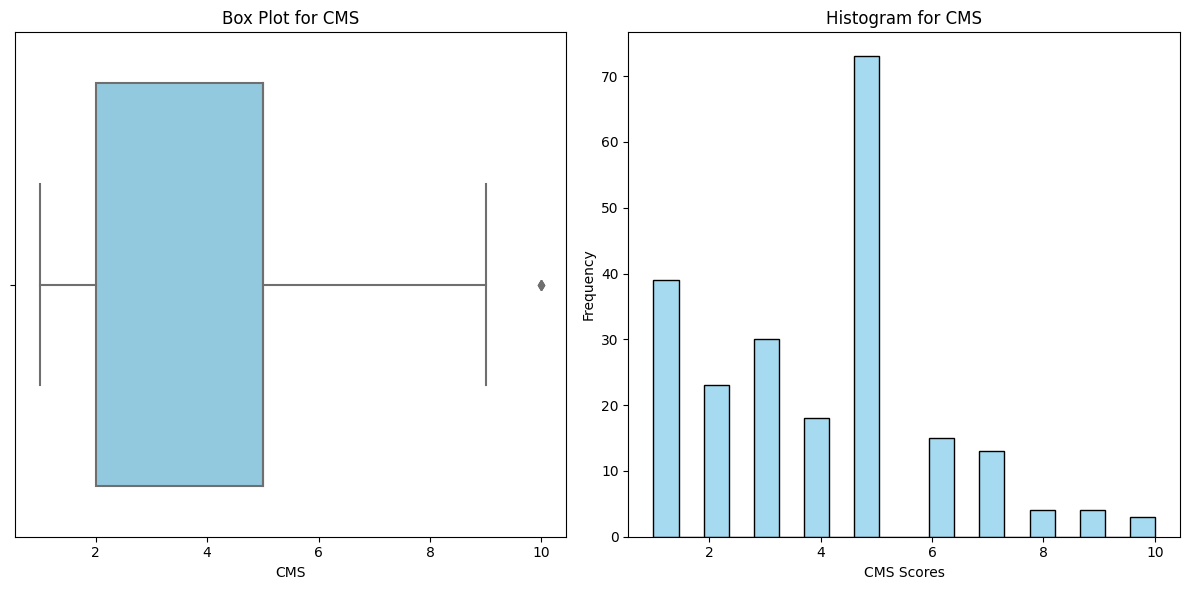

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'CMS' is the column in your DataFrame 'df'
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='CMS', data=df, color='skyblue')
plt.title('Box Plot for CMS')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['CMS'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram for CMS')
plt.xlabel('CMS Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The descriptive statistics for the 'CMS' variable highlight the satisfaction levels with the variety of coping mechanisms available among the student population:

1. **Mean Satisfaction:**
   - On average, respondents reported a satisfaction score of approximately 4.01 out of 10.

2. **Distribution:**
   - The distribution of satisfaction scores is skewed towards the lower end, as indicated by the 25th percentile (Q1) at 2 and the median (Q2) at 5.
   - The 75th percentile (Q3) at 5 suggests that a significant portion of respondents, approximately 75%, have reported satisfaction scores of 5 or lower.

3. **Implications:**
   - The results emphasize a prevalent trend of relatively low satisfaction with the available coping mechanisms. This warrants attention, as a majority of respondents express dissatisfaction or only moderate satisfaction with the range of coping resources.
   - Understanding specific areas or types of coping mechanisms that receive lower satisfaction scores can guide efforts to enhance and diversify available resources to better meet the needs of the student community.

EYI is the answer to "On a scale from 1 to 10, how does your ability to express yourself impact your overall well-being?"

Descriptive Statistics for 'EYI' in dataframe
count    222.000000
mean       6.175676
std        2.349688
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: EYI, dtype: float64


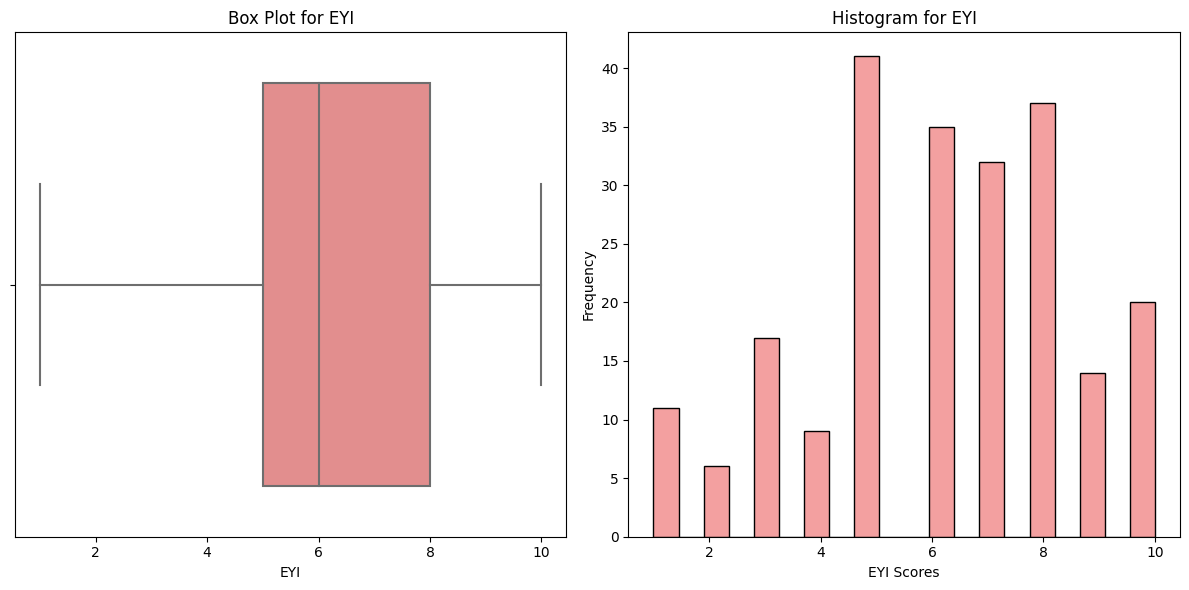

In [ ]:
# Assuming 'EYI' is the column in your DataFrame 'df'
eyi_stats = df['EYI'].describe()

# Print descriptive statistics
print("Descriptive Statistics for 'EYI' in dataframe")
print(eyi_stats)

# Create box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='EYI', data=df, color='lightcoral')
plt.title('Box Plot for EYI')

# Create histogram
plt.subplot(1, 2, 2)
sns.histplot(df['EYI'], bins=20, kde=False, color='lightcoral', edgecolor='black')
plt.title('Histogram for EYI')
plt.xlabel('EYI Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



1. **Mean Expression of Yourself Impact (EYI):**
   - On average, respondents reported a mean score of approximately 6.18 out of 10 for how their ability to express themselves impacts their overall well-being.


2. **Distribution:**
   - The 25th percentile (Q1) at 5 and the median (Q2) at 6 indicate that a significant portion of respondents reports a positive impact, with the median being above 6, suggesting that at least 50% of respondents rate their ability to express themselves as having a somewhat positive impact on well-being.

**Overall Interpretation:**
The descriptive statistics for 'EYI' indicate a generally positive perception among respondents regarding the impact of their ability to express themselves on overall well-being. The median score above 6 suggests that a significant proportion of respondents view self-expression as having a positive impact. The variability in responses underscores the individual nature of this perception.


ETC is the answer to "On a scale from 1 to 10, how comfortable are you expressing your thoughts and feelings to others?"

Descriptive Statistics for 'ETC' in dataframe
count    222.000000
mean       4.950450
std        2.692755
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: ETC, dtype: float64


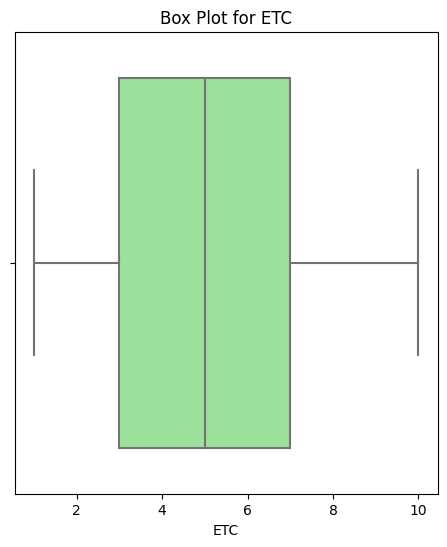

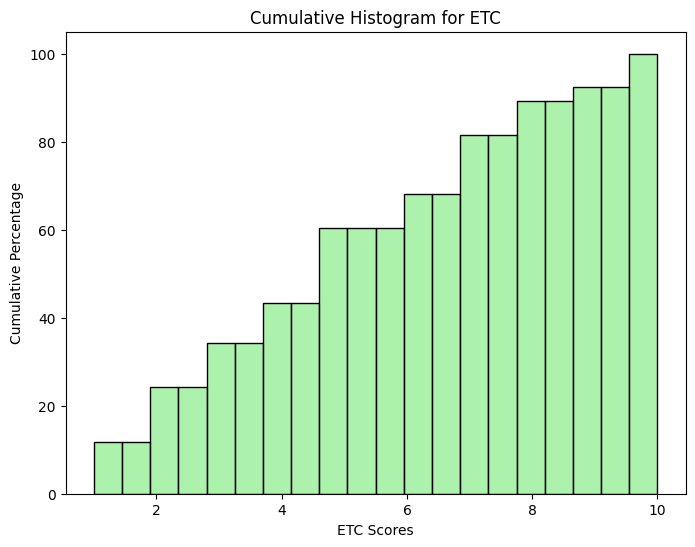

In [ ]:
# Assuming 'ETC' is the column in your DataFrame 'df'
etc_stats = df['ETC'].describe()

# Print descriptive statistics
print("Descriptive Statistics for 'ETC' in dataframe")
print(etc_stats)

# Create box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='ETC', data=df, color='lightgreen')
plt.title('Box Plot for ETC')

# Calculate cumulative percentage
cumulative_percentage = (df['ETC'].rank(method='max', pct=True) * 100).sort_values()

# Create cumulative histogram with percentages on the y-axis
plt.figure(figsize=(8, 6))
sns.histplot(df['ETC'], bins=20, kde=False, cumulative=True, stat='percent', color='lightgreen', edgecolor='black')
plt.title('Cumulative Histogram for ETC')
plt.xlabel('ETC Scores')
plt.ylabel('Cumulative Percentage')

plt.show()





1. **Mean Comfort in Expressing Thoughts and Feelings (ETC):**
   - The average comfort level in expressing thoughts and feelings is approximately 4.95 out of 10.

2. **Variability:**
   - The standard deviation of approximately 2.69 suggests a notable degree of variability in responses, indicating diverse comfort levels among respondents.

3. **Percentiles (Quartiles):**
   - The 25th percentile (Q1) at 3 and the median (Q2) at 5 indicate the central tendency of comfort levels, with at least 50% of respondents reporting a comfort level of 5 or lower.
   - The 75th percentile (Q3) at 7 suggests that a substantial proportion of respondents, approximately 75%, has reported a comfort level of 7 or lower.

4. **Interpretation:**

The descriptive statistics for 'ETC' indicate a diverse range of comfort levels among respondents when expressing thoughts and feelings. While the mean suggests a moderate comfort level, the variability in responses emphasizes the individual nature of comfort levels. The quartile values provide insights into the distribution, with a significant portion of respondents expressing comfort levels at or below 5.

**Overall Interpretation and Conclusion: Perception of Coping Mechanisms and Mental Health Resources**

In examining the variables related to the perception of coping mechanisms and mental health resources—namely, 'ETC' (Expressing Thoughts and Feelings Comfort), 'EYI' (Expression Impact on Well-Being), 'CMS' (Satisfaction with Coping Mechanisms), 'MHA' (Activities Impacting Mental Health), and 'MHRS' (Satisfaction with Mental Health Resources)—a comprehensive understanding emerges:

1. **Expressing Thoughts and Feelings (ETC):**
   - Respondents, on average, reported a moderate level of comfort (mean ≈ 4.95) in expressing their thoughts and feelings.
   - The variability in responses (std ≈ 2.69) indicates diverse comfort levels among students.
   - The quartile values highlight that at least 50% of respondents have a comfort level of 5 or lower.

2. **Expression Impact on Well-Being (EYI):**
   - The average impact of expressing oneself on well-being is generally positive (mean ≈ 6.18).
   - The distribution reveals a moderate level of variability (std ≈ 2.35), emphasizing individual differences in the perception of self-expression.

3. **Satisfaction with Coping Mechanisms (CMS):**
   - Respondents, on average, expressed a moderate level of satisfaction (mean ≈ 4.01) with the variety of coping mechanisms available.
   - The quartile values indicate that at least 75% of respondents have satisfaction scores of 5 or lower, suggesting a prevalent trend of lower satisfaction.

4. **Activities Impacting Mental Health (MHA):**
   - Respondents engage in activities positively impacting mental health with an average score of approximately 4.68.
   - The distribution highlights that over 90 students (out of 222) have scores equal to or below 4, signaling a significant portion engaging less frequently in these activities.

5. **Satisfaction with Mental Health Resources (MHRS):**
   - Respondents, on average, expressed relatively low satisfaction (mean ≈ 2.66) with the availability of mental health resources on campus.
   - The distribution indicates that at least 75% of respondents have satisfaction scores of 4 or lower, signifying a substantial dissatisfaction with available mental health resources.

**Conclusion:**
The data suggests a nuanced landscape regarding the perception of coping mechanisms and mental health resources among the student population. While there is a general positive impact of self-expression on well-being, satisfaction with coping mechanisms and mental health resources is notably moderate to low. The prevalence of lower satisfaction scores in CMS, MHA, and MHRS underscores potential areas for improvement in the variety and accessibility of coping mechanisms and mental health resources on campus.

The findings emphasize the need for targeted interventions and enhancements in mental health support services. Strategies should focus on improving the diversity and effectiveness of coping mechanisms, fostering an environment conducive to self-expression, and addressing the perceived shortcomings in mental health resource availability. Such insights can guide institutions in tailoring support systems to better meet the unique needs of the student community, ultimately contributing to improved well-being and resilience.

**4. Impact of Social Relationship and Extracurricular Activities**

SIRU is the answer to the question "On a scale from 1 to 10, how satisfied are you with your social interactions and relationships within the university community?"

Descriptive Statistics for 'SIRU' in dataframe
count    222.000000
mean       5.896396
std        2.352064
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: SIRU, dtype: float64


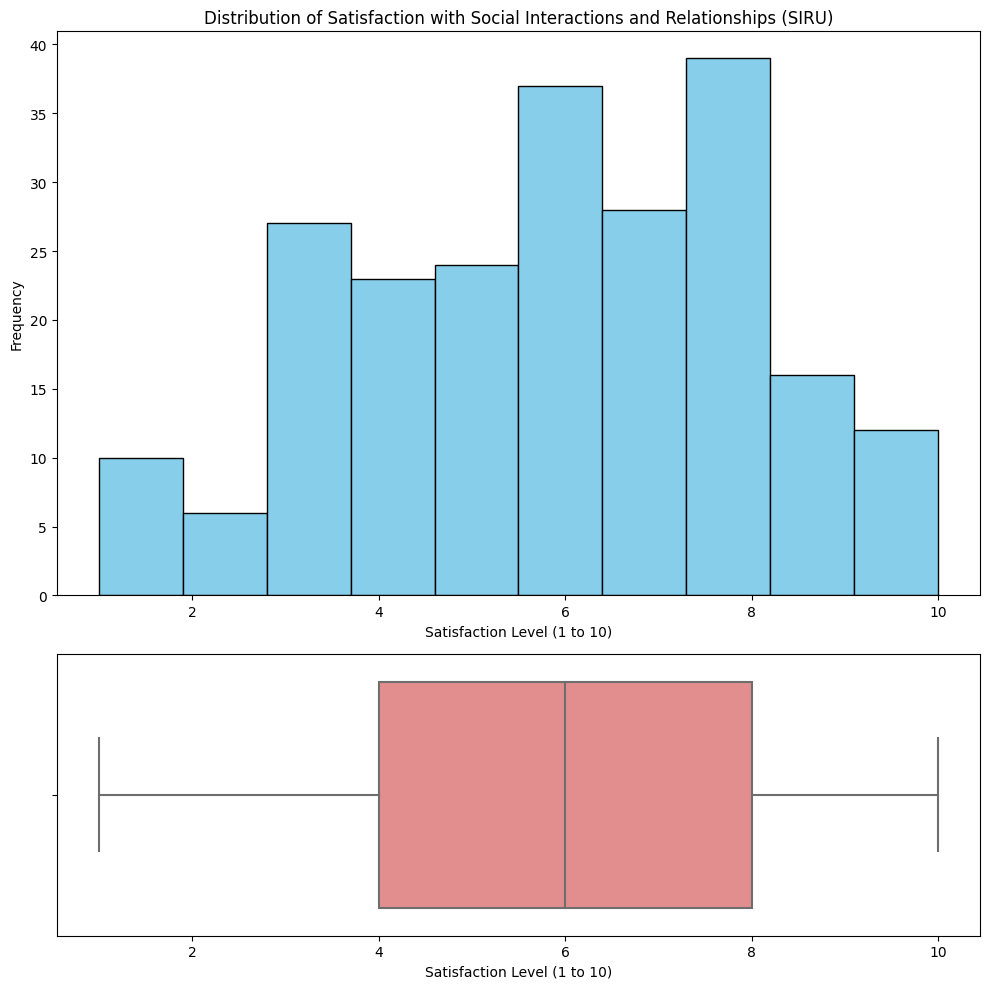

In [ ]:

siru_stats = df['SIRU'].describe()
# Print Descriptive Statistics
print("Descriptive Statistics for 'SIRU' in dataframe")
print(siru_stats)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

# Box Plot
sns.boxplot(x=df['SIRU'], ax=ax2, color='lightcoral')
ax2.set_xlabel('Satisfaction Level (1 to 10)')
ax2.set_ylabel('')

# Histogram
ax1.hist(df['SIRU'], bins=10, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Satisfaction with Social Interactions and Relationships (SIRU)')
ax1.set_xlabel('Satisfaction Level (1 to 10)')
ax1.set_ylabel('Frequency')



# Adjust layout
plt.tight_layout()
plt.show()


The descriptive statistics for the 'SIRU' variable provide insights into the distribution of responses to the question "On a scale from 1 to 10, how satisfied are you with your social interactions and relationships within the university community?"

- **Mean (Average):**
  - The mean satisfaction level is approximately 5.90, indicating a moderate level of satisfaction with social interactions and relationships. This suggests that, on average, students have a relatively positive perception of their social experiences within the university community.

- **Standard Deviation:**
  - With a standard deviation of approximately 2.35, there is a moderate degree of variability in satisfaction levels across respondents. This suggests that while the average satisfaction is moderate, individual experiences vary, with some students expressing higher or lower satisfaction with their social interactions.

- **Percentiles (Quartiles):**
  - 25th Percentile (Q1) = 4.00: At the 25th percentile, a quarter of respondents reported satisfaction levels at or below 4, indicating that a portion of students experiences lower satisfaction in their social interactions.
  - 50th Percentile (Median or Q2) = 6.00: The median satisfaction level of 6 indicates that 50% of respondents reported satisfaction levels at or below this point, providing a central measure for the dataset.
  - 75th Percentile (Q3) = 8.00: At the 75th percentile, three-quarters of respondents reported satisfaction levels at or below 8, showing that a significant portion of students reports relatively high satisfaction with their social interactions.

In summary, the data suggests a moderately positive perception of social interactions and relationships within the university community, with some variation in satisfaction levels among students. While the majority reports satisfaction, there is a range of experiences, and understanding these variations can be valuable for enhancing the overall social environment on campus.

*-------------------------------------------------------*

SB is the answer to the question "To what extent do you feel a sense of belonging within your university community? (1 = Not at all, 5 = Moderately, 10 = Completely)"



Descriptive Statistics for 'SB' in dataframe
count    222.00000
mean       5.18018
std        2.71646
min        1.00000
25%        3.00000
50%        5.00000
75%        7.00000
max       10.00000
Name: SB, dtype: float64


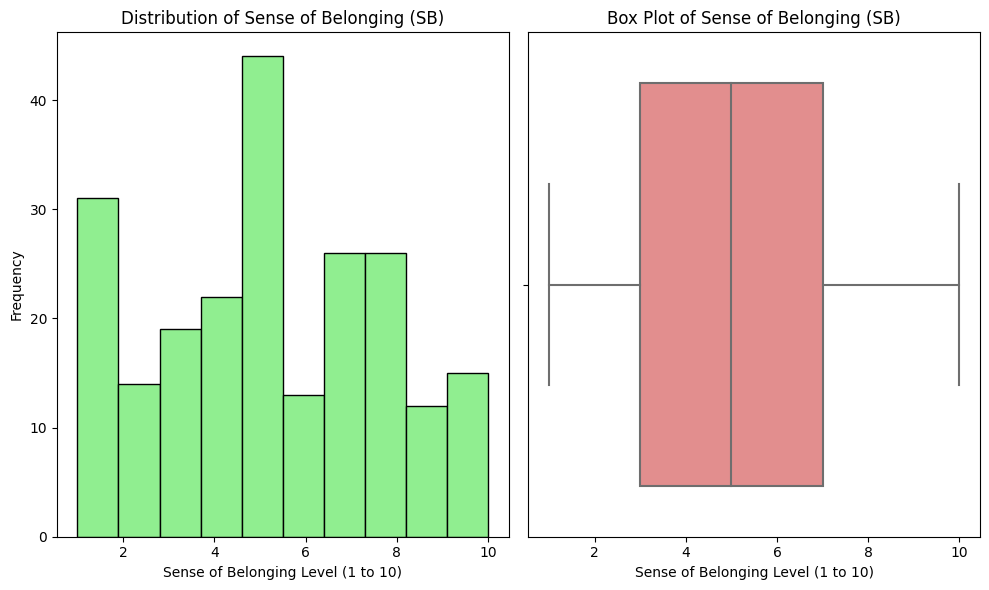

In [ ]:
# Descriptive Analysis for 'SB'
sb_stats = df['SB'].describe()

# Print Descriptive Statistics
print("Descriptive Statistics for 'SB' in dataframe")
print(sb_stats)

# Plot Histogram and Box Plot
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['SB'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sense of Belonging (SB)')
plt.xlabel('Sense of Belonging Level (1 to 10)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SB'], color='lightcoral')
plt.title('Box Plot of Sense of Belonging (SB)')
plt.xlabel('Sense of Belonging Level (1 to 10)')

# Adjust layout
plt.tight_layout()
plt.show()


The descriptive statistics for the 'SB' variable, which represents the sense of belonging within the university community, are as follows:

- **Mean (Average):**
  - The mean sense of belonging is approximately 5.18, indicating a moderate level of perceived belongingness within the university community. On average, students report a sense of connection and affiliation with their academic environment.

- **Standard Deviation:**
  - With a standard deviation of approximately 2.72, there is a notable degree of variability in the reported sense of belonging across respondents. This suggests that individual experiences of belonging vary, with some students expressing higher or lower levels of connection to the university community.

- **Percentiles (Quartiles):**
  - 25th Percentile (Q1) = 3.00: At the 25th percentile, a quarter of respondents reported a sense of belonging at or below 3, indicating that some students perceive a relatively lower sense of belonging.
  - 50th Percentile (Median or Q2) = 5.00: The median sense of belonging of 5 indicates that 50% of respondents reported a sense of belonging at or below this point, providing a central measure for the dataset.
  - 75th Percentile (Q3) = 7.00: At the 75th percentile, three-quarters of respondents reported a sense of belonging at or below 7, showing that a significant portion of students reports a moderate to high sense of belonging.

In summary, the data suggests a moderate level of perceived belongingness within the university community, with considerable variability among individual experiences. While the average sense of belonging is moderate, understanding the factors contributing to individual variations can be essential for fostering a supportive and inclusive campus environment.




---





SSN is the answer to the question "How supported do you feel by your social network during challenging times? (1 = Not supported, 5 = Moderately supported, 10 = Very supported)"


Descriptive Statistics for 'SSN' in dataframe
count    222.000000
mean       5.063063
std        2.542950
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: SSN, dtype: float64


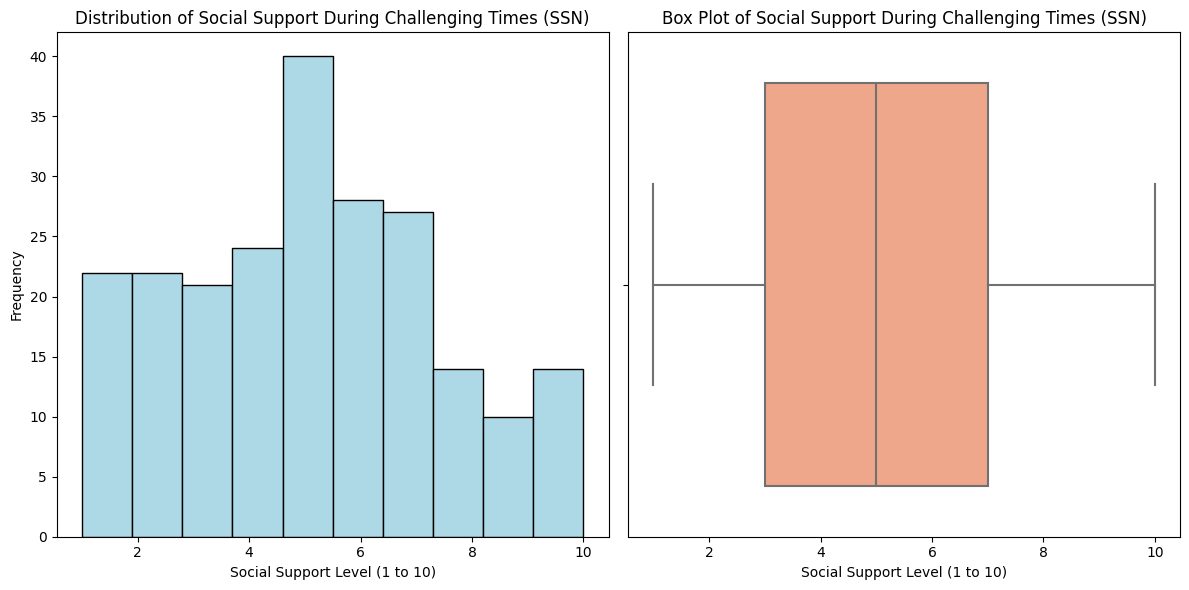

In [ ]:
# Descriptive Analysis for 'SSN'
ssn_stats = df['SSN'].describe()

# Print Descriptive Statistics
print("Descriptive Statistics for 'SSN' in dataframe")
print(ssn_stats)

# Plot Histogram and Box Plot
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['SSN'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Social Support During Challenging Times (SSN)')
plt.xlabel('Social Support Level (1 to 10)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SSN'], color='lightsalmon')
plt.title('Box Plot of Social Support During Challenging Times (SSN)')
plt.xlabel('Social Support Level (1 to 10)')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Count of answers for each value in 'SSN'
ssn_counts = df['SSN'].value_counts().sort_index()

# Print the counts
print("Number of Answers by Value in 'SSN'")
print(ssn_counts)


Number of Answers by Value in 'SSN'
1.0     22
2.0     22
3.0     21
4.0     24
5.0     40
6.0     28
7.0     27
8.0     14
9.0     10
10.0    14
Name: SSN, dtype: int64


**Number of Answers by Value in 'SSN':**
- Responses are distributed across various levels of social support.
- Notable clusters of responses are observed around the mid-range values, particularly 4, 5, 6, and 7.
- The data suggests a diverse but generally positive perception of social support during challenging times.

**Descriptive Statistics for 'SSN' in DataFrame:**
- The mean social support score is approximately 5.06, indicating a moderate level of perceived support on average.
- The minimum score of 1 and the maximum score of 10 represent the full spectrum of responses.
- This suggests that, on average, students feel moderately supported by their social network during challenging times.

**Conclusion:**
The analysis of social support responses ('SSN') reveals a varied yet predominantly positive perception among students. The majority of responses center around a moderate level of support, reflecting a generally supportive social network during challenging times. Understanding these perceptions can inform targeted strategies to enhance and tailor support services, contributing to a positive social environment within the university community.

SAP is the answer to thhe question "How often do you engage in social activities with peers outside of academic settings? (1 = Rarely, 5 = Occasionally, 10 = Frequently)"

Descriptive Statistics for 'SAP' in dataframe
count    222.000000
mean       4.698198
std        2.918795
min        1.000000
25%        1.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: SAP, dtype: float64


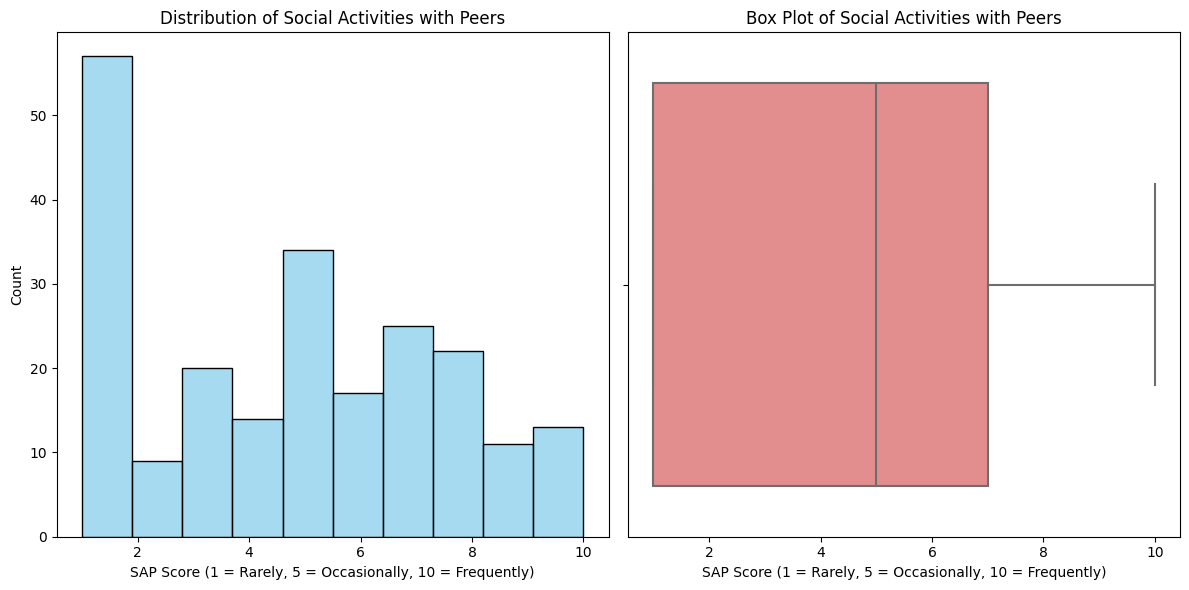

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics for 'SAP'
sap_stats = df['SAP'].describe()
print("Descriptive Statistics for 'SAP' in dataframe")
print(sap_stats)

# Plotting Histogram
plt.figure(figsize=(12, 6))

# Subplot for Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['SAP'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Social Activities with Peers')
plt.xlabel('SAP Score (1 = Rarely, 5 = Occasionally, 10 = Frequently)')
plt.ylabel('Count')

# Subplot for Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SAP'], color='lightcoral')
plt.title('Box Plot of Social Activities with Peers')
plt.xlabel('SAP Score (1 = Rarely, 5 = Occasionally, 10 = Frequently)')

plt.tight_layout()
plt.show()


In [ ]:
# Counting Number of Responses for Each Value in 'SAP'
sap_counts = df['SAP'].value_counts().sort_index()

# Displaying the Counts
print("Number of Answers by Value in 'SAP':")
print(sap_counts)


Number of Answers by Value in 'SAP':
1.0     57
2.0      9
3.0     20
4.0     14
5.0     34
6.0     17
7.0     25
8.0     22
9.0     11
10.0    13
Name: SAP, dtype: int64


The descriptive statistics for the 'SAP' variable, which reflects the frequency of engagement in social activities with peers outside of academic settings on a scale from 1 to 10, indicate potential concerns regarding the social engagement levels of the surveyed students.

The mean value of 4.70 suggests a moderate level of social interaction, but the relatively high standard deviation of 2.92 reveals a significant spread of responses. This wide variability in students' social engagement levels emphasizes the diverse experiences within the university community.

Examining the distribution of responses, a notable observation is the substantial count of 57 responses at the lower end of the scale (1.0), indicating that a considerable portion of the respondents engages in social activities rarely. This raises concerns about the potential impact on social connectedness and the overall well-being of students who experience limited social interactions outside academic settings.

In conclusion, the data highlights the severity of the issue by indicating a prevalent trend towards lower engagement in social activities. Understanding and addressing the factors contributing to this trend are crucial for university administrators and support services to implement targeted interventions that foster a more inclusive and socially supportive campus environment.

**Overall interpritation**

In essence, the examination of social factors, encompassing Social Interaction and Relationships within the University (SIRU), Sense of Belonging (SB), Social Support Network (SSN), and Social Activities with Peers (SAP), unveils a complex tapestry of students' social experiences within the university community.

1. **SIRU (Social Interaction and Relationships within the University):**
   Interpretation: The data suggests that as students perceive a moderate level of social interaction and relationships within the university community, individual experiences exhibit significant variability. This implies that the quality of social connections influences how students engage within the academic environment.

2. **SB (Sense of Belonging):**
   Interpretation: The findings point to a moderate sense of belonging within the university community, with diverse individual experiences. This indicates that a nuanced understanding of factors affecting belongingness is crucial for shaping a more supportive and inclusive campus atmosphere.

3. **SSN (Social Support Network):**
   Interpretation: Examining the distribution of responses highlights students' perceived social support during challenging times. The data reflects a moderate level of social support, showcasing variations in how students rely on their social networks in times of need.

4. **SAP (Social Activities with Peers):**
   Interpretation: The data indicates a moderate level of engagement in social activities with peers, but the broad spectrum of responses raises questions about the overall social cohesion and interaction levels among students. This suggests that the degree of involvement in social activities might impact the overall social fabric of the university community.

Overall, these social factors are intricately linked, implying that the quality of social connections and engagement can influence the overall social well-being of students. While the data suggests moderate levels on average, the observed variability underscores the need for targeted interventions to enhance specific aspects of social well-being and foster a more cohesive and supportive university environment.



---



**4. Contribution of Physical Health**

PHR is the answer to the question "How would you rate your overall physical health on a scale from 1 to 10?"

Descriptive Statistics for 'PHR' in dataframe
count    222.000000
mean       6.198198
std        1.971837
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: PHR , dtype: float64


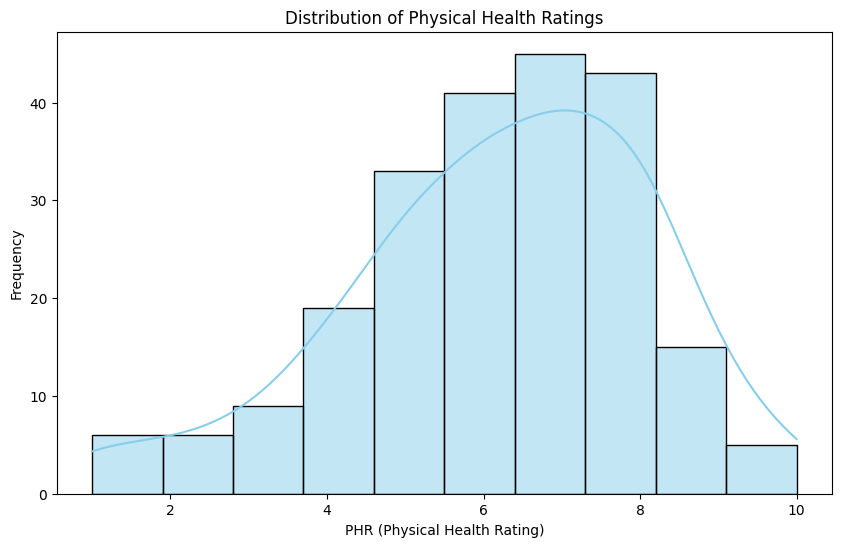

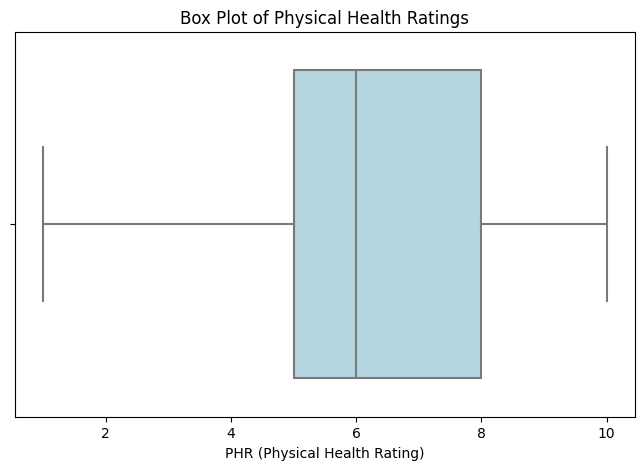

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'PHR' is the column name
PHR_stats = df['PHR '].describe()

# Descriptive Statistics
print("Descriptive Statistics for 'PHR' in dataframe")
print(PHR_stats)

# Plotting Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['PHR '], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Physical Health Ratings')
plt.xlabel('PHR (Physical Health Rating)')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='PHR ', data=df, color='lightblue')
plt.title('Box Plot of Physical Health Ratings')
plt.xlabel('PHR (Physical Health Rating)')
plt.show()


In [ ]:
# Counting occurrences of each value in 'PHR'
phr_counts = df['PHR '].value_counts().sort_index()

# Displaying the counts
print("Number of Answers by Value in 'PHR':")
print(phr_counts)


Number of Answers by Value in 'PHR':
1.0      6
2.0      6
3.0      9
4.0     19
5.0     33
6.0     41
7.0     45
8.0     43
9.0     15
10.0     5
Name: PHR , dtype: int64


- **Mean (Average):**
  - Mean = 6.20: The average physical health rating of 6.20 indicates a generally positive perception of physical well-being among the surveyed population.

- **Standard Deviation:**
  - Standard Deviation = 1.97: With a moderate standard deviation of 1.97, there is some variability in the responses. However, the majority of respondents fall within a range of about 4 to 8.

- **Percentiles (Quartiles):**
  - 25th Percentile (Q1) = 5: At the 25th percentile, a quarter of respondents reported physical health ratings at or below 5.
  - 50th Percentile (Median or Q2) = 6: The median physical health rating of 6 suggests that 50% of respondents rated their physical health at or below this point.
  - 75th Percentile (Q3) = 8: At the 75th percentile, three-quarters of respondents reported physical health ratings at or below 8.

- **Number of Answers by Value:**
  - The count of responses for each value indicates that the majority of respondents provided ratings between 5 and 8, with fewer at the extremes (1, 2, 9, 10). The most common ratings are in the mid-range, suggesting a concentration of respondents with moderate to high physical health perceptions.

In summary, the dataset reflects a generally positive perception of physical health among the surveyed population, with some variability in individual responses. The majority of respondents report physical health ratings in the mid-range, indicating a moderate to high level of well-being.



---



PAE is the answer to the question "To what extent do you engage in physical activities or exercise during a typical week? (1 = None, 5 = Occasionally, 10 = Regularly)"

Descriptive Statistics for 'PAE' in dataframe 
count    222.000000
mean       3.364865
std        2.810328
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       10.000000
Name: PAE , dtype: float64


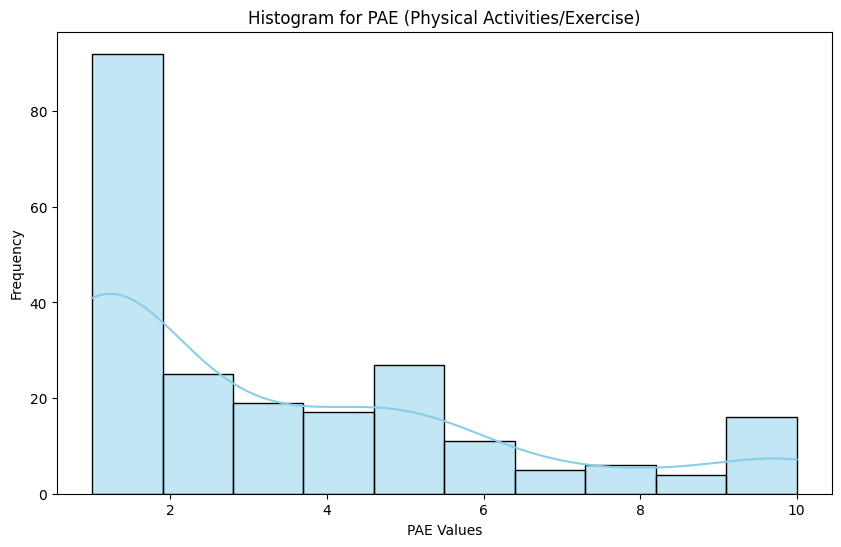

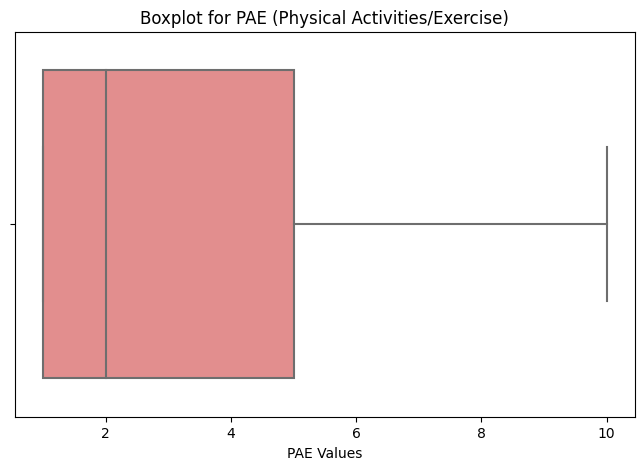

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics for 'PAE'
PAE_stats = df['PAE '].describe()
print("Descriptive Statistics for 'PAE' in dataframe ")
print(PAE_stats)

# Plotting a histogram for 'PAE'
plt.figure(figsize=(10, 6))
sns.histplot(df['PAE '], bins=10, kde=True, color='skyblue')
plt.title('Histogram for PAE (Physical Activities/Exercise)')
plt.xlabel('PAE Values')
plt.ylabel('Frequency')
plt.show()

# Plotting a boxplot for 'PAE'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['PAE '], color='lightcoral')
plt.title('Boxplot for PAE (Physical Activities/Exercise)')
plt.xlabel('PAE Values')
plt.show()


In [ ]:
# Counting the number of responses for each value in 'PAE'
PAE_counts = df['PAE '].value_counts().sort_index()

# Displaying the counts
print("Number of Answers by Value in 'PAE':")
print(PAE_counts)


Number of Answers by Value in 'PAE':
1.0     92
2.0     25
3.0     19
4.0     17
5.0     27
6.0     11
7.0      5
8.0      6
9.0      4
10.0    16
Name: PAE , dtype: int64


The descriptive analysis of the 'PAE' variable, which gauges the frequency of physical activity or exercise among respondents, reveals a concerning scenario. With a mean value of 3.36, the data suggests a relatively low average engagement in physical activities within the surveyed population. This signifies a potential area of concern, as insufficient physical activity is associated with various health risks.

The majority of respondents, as indicated by the high count at the value of 1, reported minimal or no involvement in regular physical activities. This finding highlights a need for targeted interventions to promote and support a more active lifestyle among students. Health-related initiatives, accessible facilities, and awareness campaigns may play a crucial role in encouraging and facilitating increased physical activity.

The observed weak commitment to regular exercise emphasizes the importance of addressing barriers that may be hindering physical activity. Whether due to time constraints, lack of facilities, or other factors, understanding and mitigating these challenges are essential for fostering a healthier and more active university community.

In summary, the mean value of 3.36 underscores a notable gap in regular physical activity levels among students, necessitating strategic efforts to enhance overall well-being through the promotion of healthier lifestyle choices.



---



DNS is the answer of the question" How satisfied are you with your diet and nutrition?"

Descriptive Statistics for 'DNS' in dataframe
count    222.000000
mean       4.292793
std        2.436495
min        1.000000
25%        2.000000
50%        4.000000
75%        5.750000
max       10.000000
Name: DNS, dtype: float64

Number of Answers by Value in 'DNS':
1.0     32
2.0     32
3.0     26
4.0     28
5.0     48
6.0     15
7.0     13
8.0     15
9.0      4
10.0     9
Name: DNS, dtype: int64


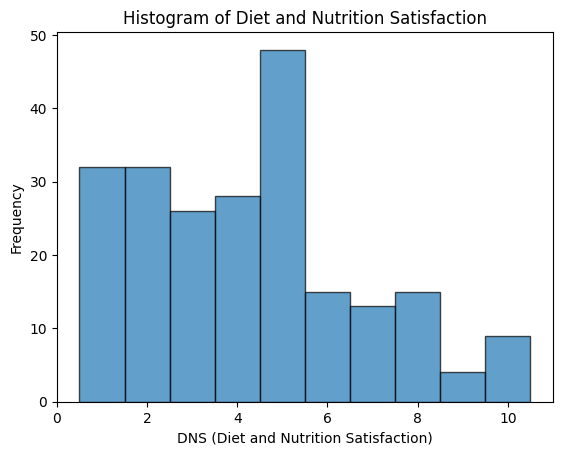

In [ ]:
# Descriptive Statistics for 'DNS' in dataframe
DNS_stats = df['DNS'].describe()
print("Descriptive Statistics for 'DNS' in dataframe")
print(DNS_stats)

# Count by value for 'DNS'
DNS_count = df['DNS'].value_counts().sort_index()
print("\nNumber of Answers by Value in 'DNS':")
print(DNS_count)

# Plot histogram for 'DNS'
import matplotlib.pyplot as plt
plt.hist(df['DNS'], bins=range(1, 12), align='left', alpha=0.7, edgecolor='black')
plt.xlabel('DNS (Diet and Nutrition Satisfaction)')
plt.ylabel('Frequency')
plt.title('Histogram of Diet and Nutrition Satisfaction')
plt.show()


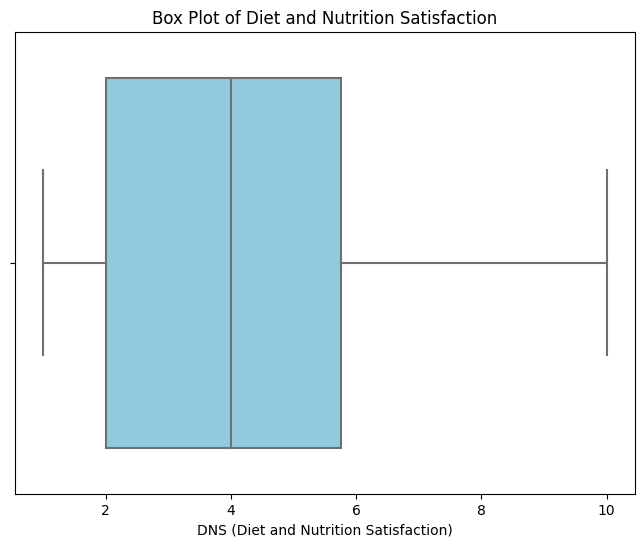

In [ ]:
# Box plot for 'DNS'
plt.figure(figsize=(8, 6))
sns.boxplot(x='DNS', data=df, color='skyblue')
plt.xlabel('DNS (Diet and Nutrition Satisfaction)')
plt.title('Box Plot of Diet and Nutrition Satisfaction')
plt.show()


**Interpretation:**

The survey results reveal a moderate mean satisfaction level with diet and nutrition (4.29), indicating room for improvement. The substantial standard deviation (2.44) underscores the diversity in respondents' satisfaction levels. The box plot illustrates that a significant number of individuals express lower to mid-range satisfaction, suggesting a need for targeted interventions.

**Conclusion:**

While the average satisfaction is moderate, the spread of responses indicates a varied landscape of dietary preferences and concerns among respondents. This information emphasizes the importance of tailoring nutritional support initiatives to address specific needs and preferences within the student community. Addressing this variability can contribute to fostering healthier eating habits and overall well-being among students.



---



PHI answers the question "On a scale from 1 to 10, how does your physical health impact your overall well-being?"

Descriptive Statistics for 'PHI' in dataframe
count    222.000000
mean       7.099099
std        2.179522
min        1.000000
25%        5.250000
50%        7.000000
75%        9.000000
max       10.000000
Name: PHI, dtype: float64
Number of Answers by Value in 'PHI':
1.0      3
2.0      5
3.0      6
4.0     10
5.0     32
6.0     23
7.0     37
8.0     44
9.0     24
10.0    38
Name: PHI, dtype: int64


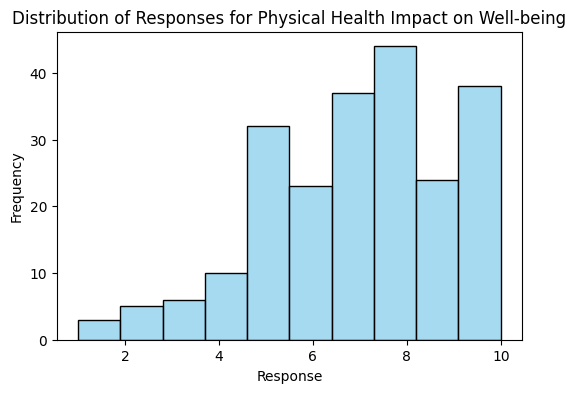

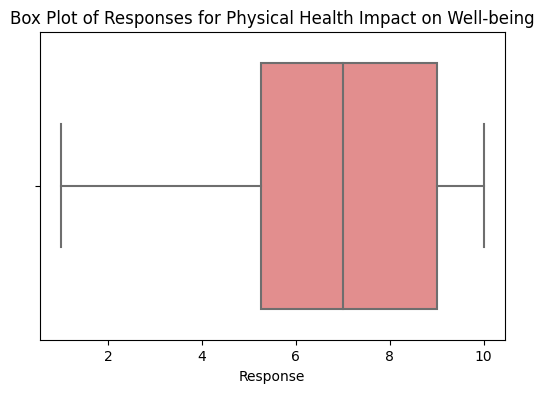

In [ ]:

# Descriptive analysis
phi_stats = df['PHI'].describe()
print("Descriptive Statistics for 'PHI' in dataframe")
print(phi_stats)

# Count the number of occurrences for each unique value in 'PHI'
phi_counts = df['PHI'].value_counts().sort_index()

# Display the counts
print("Number of Answers by Value in 'PHI':")
print(phi_counts)


# Histogram plot
plt.figure(figsize=(6, 4))
sns.histplot(df['PHI'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Responses for Physical Health Impact on Well-being')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['PHI'], color='lightcoral')
plt.title('Box Plot of Responses for Physical Health Impact on Well-being')
plt.xlabel('Response')
plt.show()


1. **Descriptive Statistics:**
   - **Mean:** The average response is 7.10, indicating a high impact of physical health on overall well-being.
   - **Standard Deviation:** With a standard deviation of 2.18, there is moderate variability in responses, suggesting diverse perceptions.

2. **Number of Answers by Value:**
   - The majority of respondents have given higher ratings, with 37 responses at 7, 44 responses at 8, and 38 responses at 10.
   - Fewer respondents gave lower ratings, with 3 responses at 1, 5 responses at 2, and 6 responses at 3.

3. **Interpretation:**
   - The mean value of 7.10 suggests a significant and high impact of physical health on overall well-being among respondents.
   - The higher count in the upper range of ratings (7, 8, and 10) indicates that a substantial portion of the respondents perceives a crucial role of physical health in their overall well-being.
   - While there is variability, the central tendency towards higher ratings emphasizes the importance of physical health for the well-being of the surveyed population.

4. **Conclusion:**
   - On average, respondents attribute a high impact of their physical health to their overall well-being.
   - The dataset highlights a prevailing perception that physical health plays a crucial and influential role in the well-being of the surveyed students.
   - Understanding the specific factors contributing to this perceived impact can provide valuable insights for promoting and enhancing the overall well-being of students.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
corr = df.corr()

# Set values less than 0.6 to NaN for masking
corr_masked = np.where((corr < 0.4) , np.nan, corr)

plt.figure(figsize=(16, 6))
# Create a heatmap with annotation for values >= 0.6
heatmap = sns.heatmap(corr_masked, vmin=-1, vmax=1, annot=True)

plt.show()




---

The variables PHI (Physical Health Impact), DNS (Diet and Nutrition Satisfaction), PAE (Physical Activities or Exercise Engagement), and PHR (Overall Physical Health Rating) collectively offer valuable insights into the Contribution of Physical Health among the surveyed population. Let's delve into an overall conclusion and interpretation:

1. **Physical Health Impact (PHI):**
   - **Mean:** The average impact of physical health on overall well-being is high (Mean = 7.10).
   - **Variability:** While there is some variability, the majority of responses are clustered in the higher range.

2. **Diet and Nutrition Satisfaction (DNS):**
   - **Mean:** On average, respondents are moderately satisfied with their diet and nutrition (Mean = 4.29).
   - **Variability:** Responses vary, with a relatively balanced distribution across different satisfaction levels.

3. **Physical Activities or Exercise Engagement (PAE):**
   - **Mean:** On average, respondents engage in physical activities or exercise at a moderate level (Mean = 3.36).
   - **Variability:** There is substantial variability, with a higher count of respondents reporting lower levels of engagement.

4. **Overall Physical Health Rating (PHR):**
   - **Mean:** Respondents, on average, rate their overall physical health positively (Mean = 6.20).
   - **Variability:** The responses are diverse, with a mix of lower and higher ratings.

**Interpretation and Relations:**
- **Causality between Physical Health Impact and Physical Activities:**
  - The high impact of physical health on well-being (PHI) aligns with the positive rating of overall physical health (PHR). This suggests a potential causal relationship where a perceived positive impact of physical health contributes to a favorable overall physical health rating.

- **Diet and Nutrition's Influence on Physical Health:**
  - While diet and nutrition satisfaction (DNS) is moderately rated on average, its impact on overall physical health could vary. Further exploration is needed to understand how dietary habits contribute to the perceived impact of physical health.

- **Physical Activities and Engagement (PAE):**
  - The moderate engagement in physical activities (PAE) indicates room for improvement. The variability in engagement levels may be associated with diverse lifestyles and preferences among respondents.

**Overall Conclusion:**
- The findings suggest that a significant portion of the surveyed population perceives a high impact of physical health on their overall well-being.
- Diet and nutrition satisfaction, along with engagement in physical activities, could be key factors influencing the perceived impact of physical health.
- To enhance the well-being of students, interventions promoting healthy dietary habits and encouraging increased physical activity engagement may be beneficial.

Understanding the interplay between these variables provides a nuanced perspective on the Contribution of Physical Health, emphasizing the need for holistic well-being initiatives that address both physical health perception and lifestyle choices.